Code primarily done by Rafaela

In [1]:
# Influenced by the aricle: 
# https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rn
import tensorflow as tf

In [3]:
# read in csv file 
tsla_url = "https://raw.githubusercontent.com/RafMeli/math156project/main/TSLA.csv"
dataset = pd.read_csv(tsla_url)
dataset.head()
# tsla has 2416 rows x 7 columns
# start 2010-06-29 
# end 2020-02-03

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:

dataset_train = dataset[384:888]
dataset_test = dataset[888:1013]
dataset_train
dataset_test

training_set = dataset_train.iloc[:1208, 1:2].values


In [5]:


from sklearn.preprocessing import MinMaxScaler


close_prices = dataset['Close']
values = close_prices.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(training_set)
train_data = scaled_data[0: len(training_set), :]



X_train = []
y_train = []
for i in range(60, len(dataset_train)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
y_test = values[len(dataset_test):]

for i in range(60, 186):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [7]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 
from keras.layers import GRU 
from keras.layers import SimpleRNN 




In [8]:

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

tsla_model_LSTM = Sequential()
# Four LSTM layers
tsla_model_LSTM.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
tsla_model_LSTM.add(Dropout(0.2))
tsla_model_LSTM.add(LSTM(100, return_sequences=True))
tsla_model_LSTM.add(Dropout(0.2))
tsla_model_LSTM.add(LSTM(100, return_sequences=True))
tsla_model_LSTM.add(Dropout(0.2))
tsla_model_LSTM.add(LSTM(100, return_sequences=False))
tsla_model_LSTM.add(Dropout(0.2))
# Fully connected layer
tsla_model_LSTM.add(Dense(100))
tsla_model_LSTM.add(Dropout(0.2))
# Output layer
tsla_model_LSTM.add(Dense(1))
tsla_model_LSTM.summary()





# GRU model
tsla_model_GRU = Sequential()

tsla_model_GRU.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
tsla_model_GRU.add(Dropout(0.2))

tsla_model_GRU.add(GRU(units=100, return_sequences=True,  activation='tanh'))
tsla_model_GRU.add(Dropout(0.2))

tsla_model_GRU.add(GRU(units=100, return_sequences=True,  activation='tanh'))
tsla_model_GRU.add(Dropout(0.2))

tsla_model_GRU.add(GRU(units=100,  activation='tanh'))
tsla_model_GRU.add(Dropout(0.2))

tsla_model_GRU.add(Dense(units=1))
tsla_model_GRU.summary()





# Simple RNN
tsla_model_simpleRNN = Sequential()
# First simpleRNN layer with Dropout regularisation
tsla_model_simpleRNN.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
tsla_model_simpleRNN.add(Dropout(0.2))
# Second simpleRNN layer
tsla_model_simpleRNN.add(SimpleRNN(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
tsla_model_simpleRNN.add(Dropout(0.2))
# Third simpleRNN layer
tsla_model_simpleRNN.add(SimpleRNN(units=100, return_sequences=True, activation='tanh'))
tsla_model_simpleRNN.add(Dropout(0.2))
# Fourth simpleRNN layer
tsla_model_simpleRNN.add(SimpleRNN(units=100, activation='tanh'))
tsla_model_simpleRNN.add(Dropout(0.2))
# Fully connected layer
tsla_model_simpleRNN.add(Dense(100))
tsla_model_simpleRNN.add(Dropout(0.2))
# The output layer
tsla_model_simpleRNN.add(Dense(units=1))
tsla_model_simpleRNN.summary()


# Combined 

# tsla_combo = Sequential()
# # First GRU layer with Dropout regularisation
# tsla_combo.add(GRU(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
# tsla_combo.add(Dropout(0.2))
# # Second GRU layer
# tsla_combo.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
# tsla_combo.add(Dropout(0.2))
# # Third GRU layer
# tsla_combo.add(GRU(units=100, return_sequences=True, activation='tanh'))
# tsla_combo.add(Dropout(0.2))
# # Fourth GRU layer
# tsla_combo.add(LSTM(units=100, activation='tanh'))
# tsla_combo.add(Dropout(0.2))
# # Fully connected layer
# tsla_combo.add(Dense(100))
# tsla_combo.add(Dropout(0.2))
# # The output layer
# tsla_combo.add(Dense(units=1))
# tsla_combo.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

In [9]:
tsla_model_LSTM.compile(optimizer='adam',loss='mean_squared_error') 
tsla_model_GRU.compile(optimizer='adam',loss='mean_squared_error') 
tsla_model_simpleRNN.compile(optimizer='adam',loss='mean_squared_error') 
# tsla_combo.compile(optimizer='adam',loss='mean_squared_error') 

print("LSTM")
history_LSTM = tsla_model_LSTM.fit(X_train,y_train,epochs=20,batch_size=32)
print("\n GRU")
history_GRU = tsla_model_GRU.fit(X_train,y_train,epochs=20,batch_size=32)
print("\n SimpleRNN")
history_simpleRNN = tsla_model_simpleRNN.fit(X_train,y_train,epochs=20,batch_size=32)
# print("\n Combination of LSTM and GRu")
# history_combo = tsla_combo.fit(X_train,y_train,epochs=5,batch_size=32)


LSTM
Epoch 1/20
14/14 [==============================] - 18s 22ms/step - loss: 0.0516
Epoch 2/20
14/14 [==============================] - 0s 14ms/step - loss: 0.0118
Epoch 3/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0080
Epoch 4/20
14/14 [==============================] - 0s 15ms/step - loss: 0.0075
Epoch 5/20
14/14 [==============================] - 0s 13ms/step - loss: 0.0052
Epoch 6/20
14/14 [==============================] - 0s 20ms/step - loss: 0.0046
Epoch 7/20
14/14 [==============================] - 0s 19ms/step - loss: 0.0044
Epoch 8/20
14/14 [==============================] - 0s 19ms/step - loss: 0.0058
Epoch 9/20
14/14 [==============================] - 0s 18ms/step - loss: 0.0058
Epoch 10/20
14/14 [==============================] - 0s 17ms/step - loss: 0.0043
Epoch 11/20
14/14 [==============================] - 0s 17ms/step - loss: 0.0057
Epoch 12/20
14/14 [==============================] - 0s 19ms/step - loss: 0.0050
Epoch 13/20
14/14 [============

In [10]:

predicted_stock_price_LSTM = tsla_model_LSTM.predict(X_test)
predicted_stock_price_LSTM = scaler.inverse_transform(predicted_stock_price_LSTM)

predicted_stock_price_GRU = tsla_model_GRU.predict(X_test)
predicted_stock_price_GRU = scaler.inverse_transform(predicted_stock_price_GRU)

predicted_stock_price_simpleRNN = tsla_model_simpleRNN.predict(X_test)
predicted_stock_price_simpleRNN = scaler.inverse_transform(predicted_stock_price_simpleRNN)

# predicted_stock_price_combo = tsla_combo.predict(X_test)
# predicted_stock_price_combo = scaler.inverse_transform(predicted_stock_price_combo)

4/4 [==============================] - 0s 21ms/step


In [11]:
#LSTM root mean square
LSTM_rmse = np.sqrt(np.mean((predicted_stock_price_LSTM - y_test)**2))
print("LSTM model root mean square error: " + str(LSTM_rmse))

#GRU root mean square
GRU_rmse = np.sqrt(np.mean((predicted_stock_price_GRU - y_test)**2))
print("GRU model root mean square error: " +  str(GRU_rmse))

#RNN root mean square
RNN_rmse = np.sqrt(np.mean((predicted_stock_price_simpleRNN - y_test)**2))
print("RNN model root mean square error: " +  str(RNN_rmse))

LSTM model root mean square error: 116.91697247550825
GRU model root mean square error: 117.85528175661338
RNN model root mean square error: 119.26400479938637


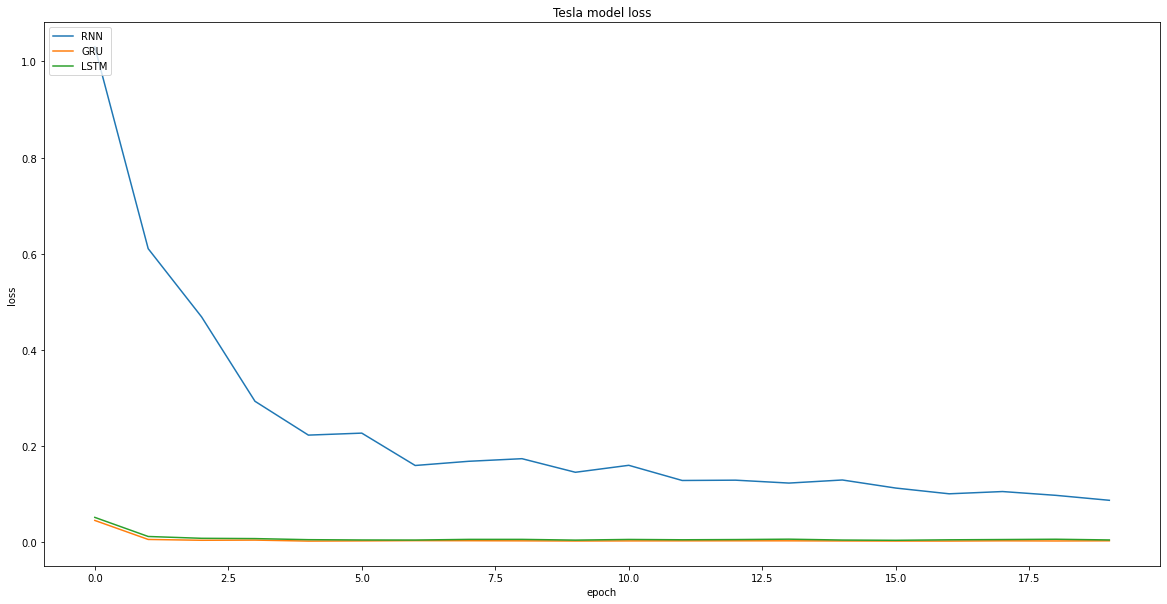

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(history_simpleRNN.history['loss'])
plt.plot(history_GRU.history['loss'])
plt.plot(history_LSTM.history['loss'])
plt.title('Tesla model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['RNN', 'GRU', 'LSTM'], loc='upper left')
plt.show()

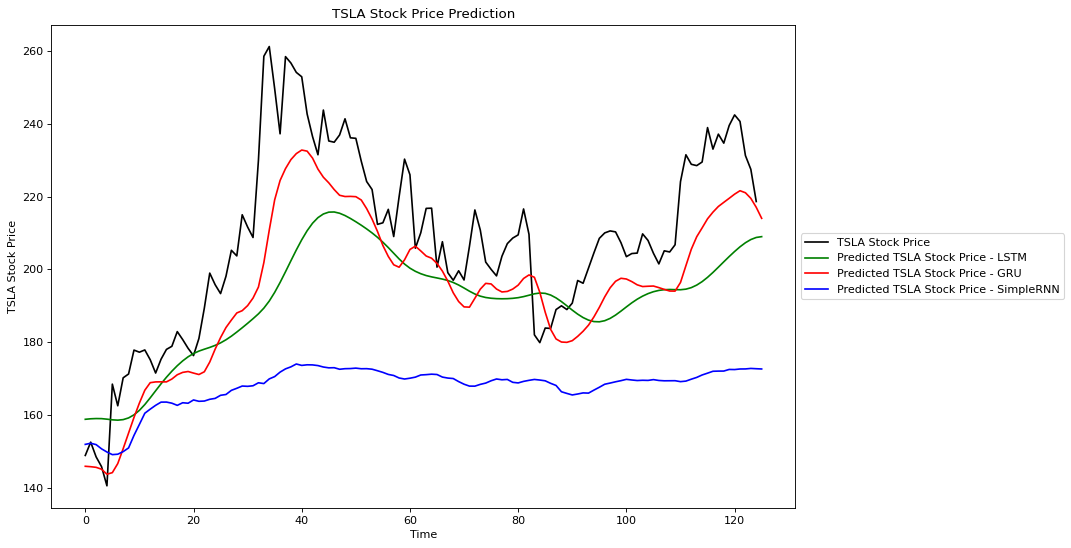

In [13]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)
plt.plot(real_stock_price, color = 'black', label = 'TSLA Stock Price')
plt.plot(predicted_stock_price_LSTM, color = 'green', label = 'Predicted TSLA Stock Price - LSTM')
plt.plot(predicted_stock_price_GRU, color = 'red', label = 'Predicted TSLA Stock Price - GRU')
plt.plot(predicted_stock_price_simpleRNN, color = 'blue', label = 'Predicted TSLA Stock Price - SimpleRNN')
# plt.plot(predicted_stock_price_combo, color = 'purple', label = 'Predicted TSLA Stock Price - Combination')


plt.title('TSLA Stock Price Prediction')
plt.xlabel('Time') 
plt.ylabel('TSLA Stock Price')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<ipython-input-14-489df53363f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predicted_stock_price_LSTM


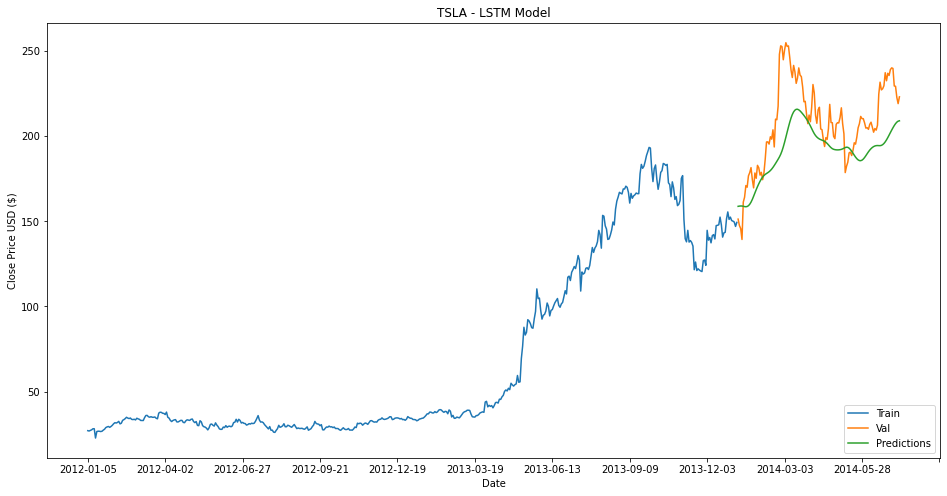

In [14]:
data = dataset.filter(['Close'])
train = data[384:888]

validation = data[888:1014]

validation['Predictions'] = predicted_stock_price_LSTM
plt.figure(figsize=(16,8))
plt.title('TSLA - LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(dataset['Close']), 60))
plt.plot(dataset["Date"][384:888], train)
plt.plot(dataset["Date"][888:1014], validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-15-2d69921061d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predicted_stock_price_GRU


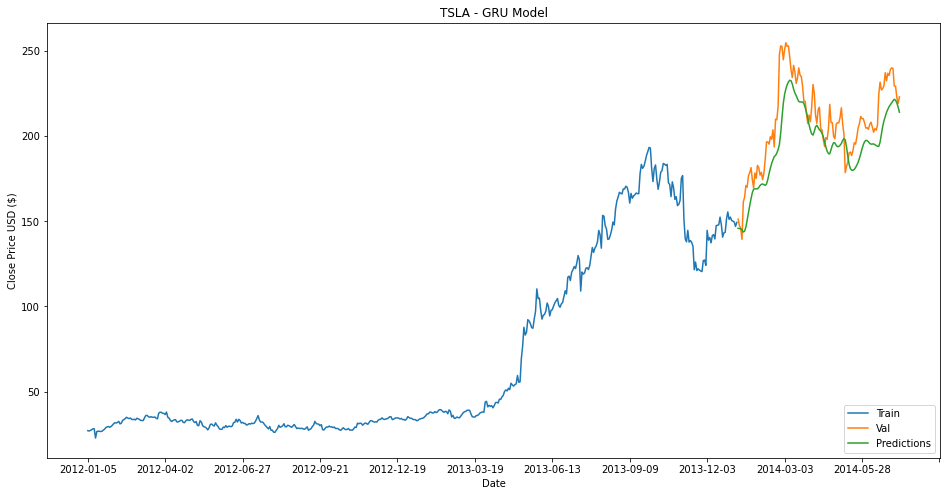

In [15]:
data = dataset.filter(['Close'])
train = data[384:888]

validation = data[888:1014]

validation['Predictions'] = predicted_stock_price_GRU
plt.figure(figsize=(16,8))
plt.title('TSLA - GRU Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(dataset['Close']), 60))
plt.plot(dataset["Date"][384:888], train)
plt.plot(dataset["Date"][888:1014], validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-16-61c7ab914348>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predicted_stock_price_simpleRNN


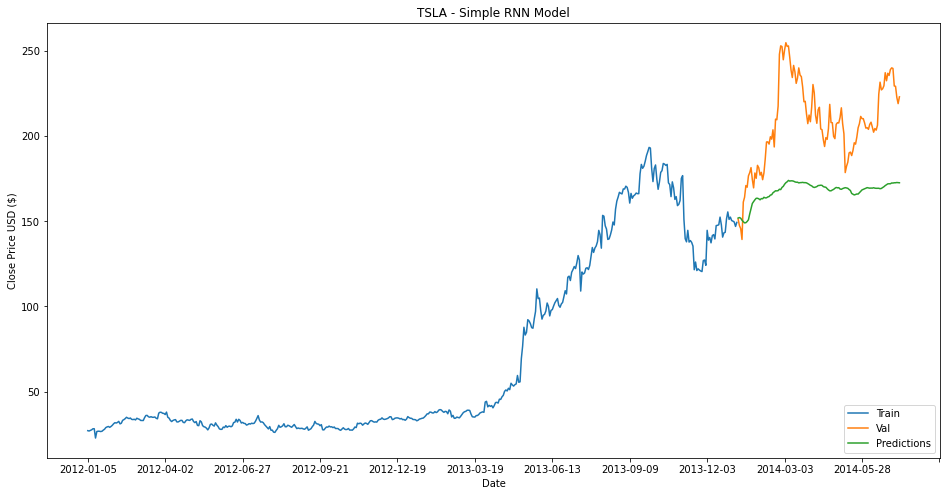

In [16]:
data = dataset.filter(['Close'])
train = data[384:888]

validation = data[888:1014]

validation['Predictions'] = predicted_stock_price_simpleRNN
plt.figure(figsize=(16,8))
plt.title('TSLA - Simple RNN Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(dataset['Close']), 60))
plt.plot(dataset["Date"][384:888], train)
plt.plot(dataset["Date"][888:1014], validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [17]:
# data = dataset.filter(['Close'])
# train = data[384:888]

# validation = data[888:1014]

# validation['Predictions'] = predicted_stock_price_combo
# plt.figure(figsize=(16,8))
# plt.title('TSLA - LSTM and GRU combination')
# plt.xlabel('Date')
# plt.ylabel('Close Price USD ($)')
# plt.xticks(np.arange(0, len(dataset['Close']), 60))
# plt.plot(dataset["Date"][384:888], train)
# plt.plot(dataset["Date"][888:1014], validation[['Close', 'Predictions']])
# plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
# plt.show()

<ipython-input-18-73606e989915>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['RNN Predictions'] = predicted_stock_price_simpleRNN
<ipython-input-18-73606e989915>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['LSTM Predictions'] = predicted_stock_price_LSTM
<ipython-input-18-73606e989915>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

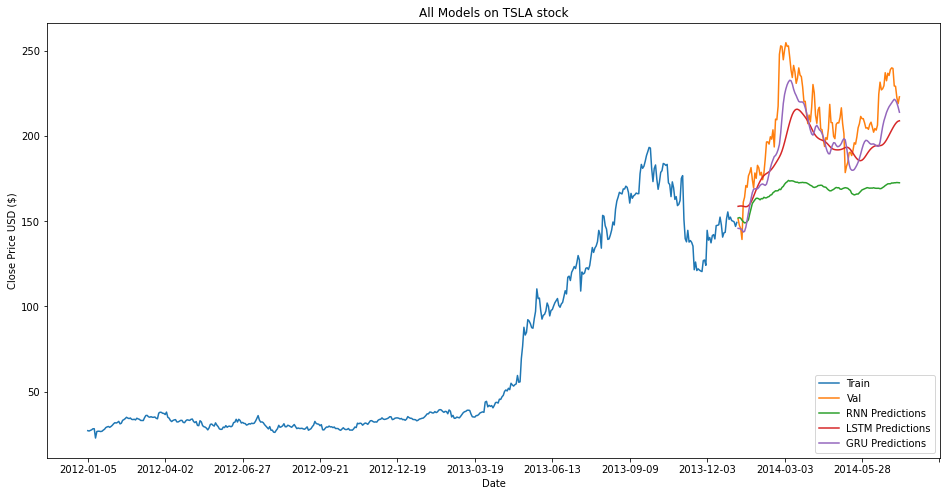

In [18]:
data = dataset.filter(['Close'])
train = data[384:888]
validation = data[888:1014]
validation['RNN Predictions'] = predicted_stock_price_simpleRNN
validation['LSTM Predictions'] = predicted_stock_price_LSTM
validation['GRU Predictions'] = predicted_stock_price_GRU
plt.figure(figsize=(16,8))
plt.title('All Models on TSLA stock')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.xticks(np.arange(0, len(dataset['Close']), 60))
plt.plot(dataset["Date"][384:888], train)
plt.plot(dataset["Date"][888:1014], validation[['Close', 'RNN Predictions']])
plt.plot(dataset["Date"][888:1014], validation[['LSTM Predictions']])
plt.plot(dataset["Date"][888:1014], validation[['GRU Predictions']])
plt.legend(['Train', 'Val', 'RNN Predictions', "LSTM Predictions", "GRU Predictions"], 
           loc='lower right')
plt.show()